In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])

df['BP']=le.fit_transform(df['BP'])

df['Cholesterol']=le.fit_transform(df['Cholesterol'])

df['Drug']=le.fit_transform(df['Drug'])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
x=df.drop(['Drug'],axis=1)
y=df['Drug']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 5), (80, 5), (120,), (80,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
import joblib
import sklearn

joblib.dump(sc, 'scaler.save')

['scaler.save']

In [ ]:
data = df.values[0].tolist()
print(data)
label = data[5]#to remove and store last value (exited)
del data[5]
print(data)
print(label)
test_val = sc.transform([data])
print(test_val)

[23.0, 0.0, 0.0, 0.0, 25.355, 4.0]
[23.0, 0.0, 0.0, 0.0, 25.355]
4.0
[[-1.27594802 -1.16316    -1.08347268 -1.03390789  1.39092389]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


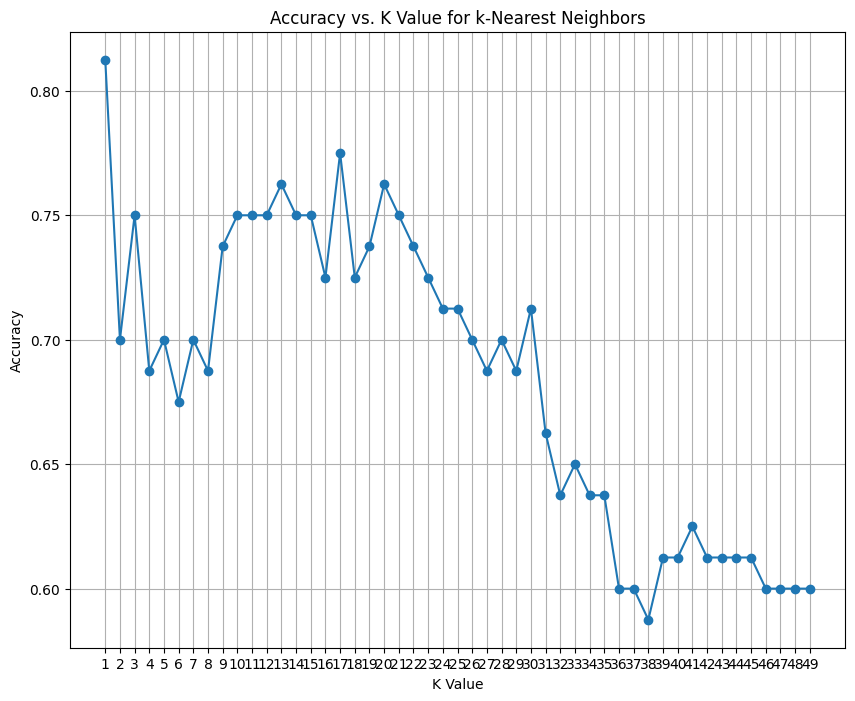

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
accuracies = []
k_values = [x for x in range(1,50)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(10, 8))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3,p=2)

knn.fit(x,y)
z=knn.predict(x)
z

array([4, 2, 2, 3, 4, 2, 4, 3, 1, 4, 2, 4, 4, 4, 3, 4, 1, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 0, 4, 3, 3, 0, 4, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 1, 4, 4, 4, 3, 4, 4, 1, 2, 3, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 3, 4, 0, 0, 1, 3, 0, 3, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 4, 0, 2, 0, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 1, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 0, 4, 4,
       3, 4, 4, 1, 1, 0, 1, 3, 0, 4, 3, 4, 0, 3, 3, 2, 3, 2, 0, 1, 3, 4,
       4, 0, 0, 4, 1, 3, 3, 1, 0, 4, 4, 4, 4, 3, 4, 0, 0, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 0, 4, 4, 4, 1, 0, 4, 4, 4, 2, 4, 1, 4, 1, 3, 1,
       3, 3])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred,y_test)
accuracy

0.6

Decision Tree Calassifier

In [ ]:
from sklearn import tree,metrics

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [ ]:
y_pred = dtree.predict(x_test)

count_misclassified = (y_test != y_pred).sum()
print(f'Misclassified samples: {count_misclassified}')
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

Misclassified samples: 11
0.8625


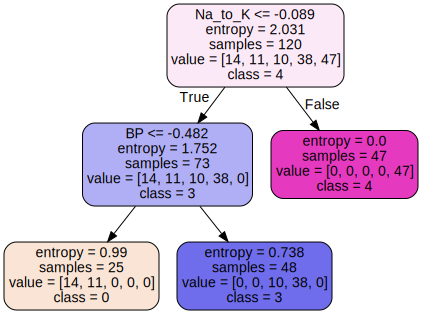

In [ ]:
import graphviz
feature_cols = ['Age', 'Sex', 'BP','Cholersterol','Na_to_K']
feature_names = x.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_cols,
                                class_names=["0","1",'2','3','4','5'])
graph = graphviz.Source(dot_data)
graph

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "iris_classifier_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(dtree, file)

In [ ]:
y_pred = dtree.predict(x_test)

count_misclassified = (y_test != y_pred).sum()
print(f'Misclassified samples: {count_misclassified}')
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

Misclassified samples: 11
0.8625


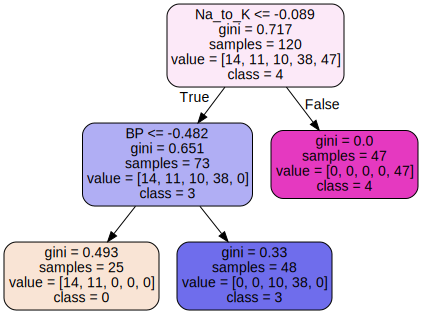

In [ ]:
# feature_cols = ['Age', 'Sex', 'BP','Cholersterol','Na_to_K']
feature_names = x.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_cols,
                                class_names=["0","1",'2','3','4','5'])
graph = graphviz.Source(dot_data)
graph

***Support Vendor Machine***

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         6
           3       0.76      1.00      0.86        16
           4       1.00      0.89      0.94        44

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.87        80
weighted avg       0.92      0.90      0.90        80



In [ ]:
pred

array([3, 4, 3, 3, 3, 1, 2, 1, 4, 3, 4, 4, 4, 4, 0, 2, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 0, 4, 4, 1, 4, 4, 0, 4, 3, 4,
       4, 4, 1, 4, 0, 3, 3, 0, 4, 0, 4, 3, 0, 3, 3, 4, 4, 4, 4, 3, 0, 2,
       4, 3, 1, 1, 4, 4, 3, 3, 2, 4, 4, 0, 3, 4])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.8   0.875 0.8   0.65  0.75 ]
Mean score: 0.775


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Source:  https://drive.google.com/file/d/1BHmNm-7DZMod_sdumI7chUgQWlmdYz6v/view?usp=drive_link